# Upload Necessary Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Reading Dataset

In [82]:
data = pd.read_csv('cpsaat_2015_2021.csv')

In [83]:
data.head(15).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

C:\Users\zee52\AppData\Local\Temp\ipykernel_30032\826336969.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  data.head(15).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


Civilian noninstitutional population,Civilian labor force,Participation rate,Employed,Employment-population ratio,Unemployed,Unemployment rate,Sex,Race,Year
"24,175","10,971",45.400000,"10,098",41.800000,873,8.000000,nan,nan,2015
"61,712","35,322",57.200000,"33,402",54.100000,"1,920",5.400000,nan,nan,2015
"56,263","37,481",66.600000,"35,785",63.600000,"1,695",4.500000,nan,nan,2015
"35,326","22,706",64.300000,"21,573",61.100000,"1,134",5.000000,nan,nan,2015
"20,937","14,774",70.600000,"14,213",67.900000,562,3.800000,nan,nan,2015
"70,061","52,133",74.400000,"50,792",72.500000,"1,341",2.600000,nan,nan,2015
"44,086","32,684",74.100000,"31,772",72.100000,912,2.800000,nan,nan,2015
"25,975","19,449",74.900000,"19,020",73.200000,429,2.200000,nan,nan,2015
"12,137","7,081",58.300000,"6,573",54.200000,507,7.200000,Men,nan,2015
"30,388","20,416",67.200000,"19,302",63.500000,"1,114",5.500000,Men,nan,2015


In [84]:
data.shape

(392, 10)

In [85]:
data['Unemployment rate'].value_counts()

2.2     14
2.0     13
2.7     13
2.8     13
4.0     12
        ..
11.7     1
1.7      1
12.5     1
10.4     1
8.1      1
Name: Unemployment rate, Length: 92, dtype: int64

In [86]:
data.describe()

,Participation rate,Employment-population ratio,Unemployment rate,Year
count,392.000000,392.000000,392.000000,392.000000
mean,66.596173,63.677296,4.653061,2018.000000
std,11.037426,11.425293,2.613949,2.002556
min,32.300000,28.200000,1.700000,2015.000000
25%,60.775000,57.550000,2.800000,2016.000000
50%,69.600000,66.900000,3.900000,2018.000000
75%,74.125000,72.025000,5.625000,2020.000000
max,81.800000,80.200000,16.600000,2021.000000


### Check if there are any Null values

In [87]:
data.isnull().sum()

Civilian noninstitutional population      0
Civilian labor force                      0
Participation rate                        0
Employed                                  0
Employment-population ratio               0
Unemployed                                0
Unemployment rate                         0
Sex                                     280
Race                                    168
Year                                      0
dtype: int64

In [88]:
print('We have ',(280/390)*100,'% null values in sex feature')

We have  71.7948717948718 % null values in sex feature


### If the information contained in the variable is not that high, you can drop the variable if it has more than 50% missing values
#### So, We are going to drop Sex Feature 

In [89]:
data = data.drop(['Sex'],axis=1)

In [90]:
data.isnull().sum()

Civilian noninstitutional population      0
Civilian labor force                      0
Participation rate                        0
Employed                                  0
Employment-population ratio               0
Unemployed                                0
Unemployment rate                         0
Race                                    168
Year                                      0
dtype: int64

In [91]:
data['Race'].value_counts()

White                           56
Black or African American       56
Asian                           56
Hispanic or Latino ethnicity    56
Name: Race, dtype: int64

# EDA

In [92]:
# plt.figure(figsize= (14,10))
# sns.heatmap(data.corr(),annot = True , cmap = "YlGnBu")

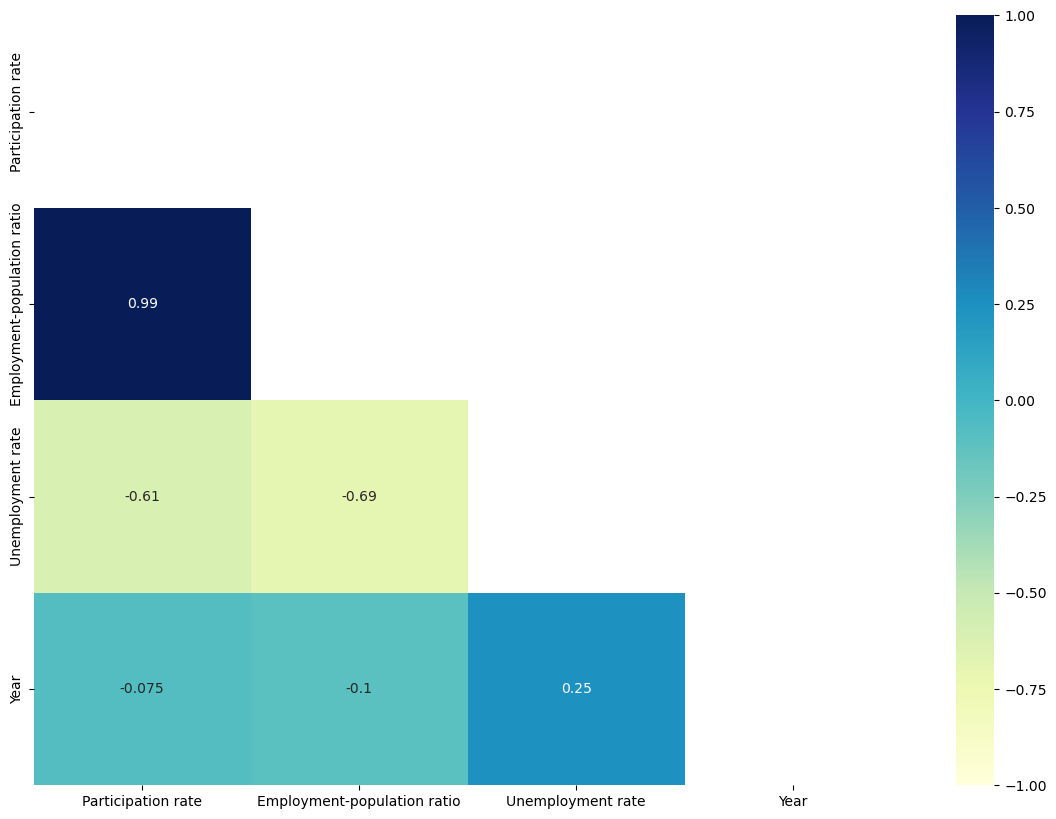

In [93]:
plt.figure(figsize= (14,10))

corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(data = corr,
            annot = True,
            mask = mask,
            cmap = "YlGnBu",
            vmin = -1,
            vmax = 1);

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Race', ylabel='count'>

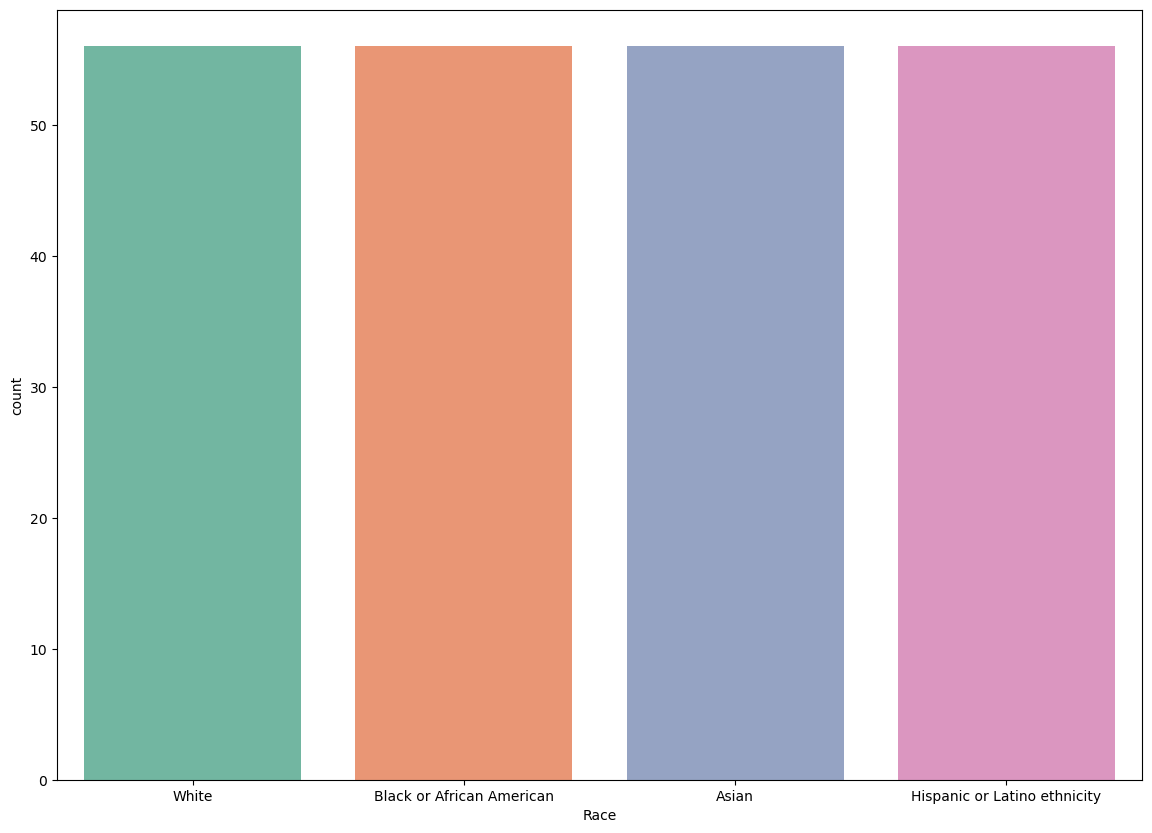

In [94]:
plt.figure(figsize= (14,10))
sns.countplot(data['Race'],palette='Set2')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian noninstitutional population  392 non-null    object 
 1   Civilian labor force                  392 non-null    object 
 2   Participation rate                    392 non-null    float64
 3   Employed                              392 non-null    object 
 4   Employment-population ratio           392 non-null    float64
 5   Unemployed                            392 non-null    object 
 6   Unemployment rate                     392 non-null    float64
 7   Race                                  224 non-null    object 
 8   Year                                  392 non-null    int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 27.7+ KB


#### Civilian noninstitutional population , Civilian labor force , Unemployed , Employed and Race features need to be change to a numeric type 

##### first remove ',' from Unemployed , Civilian noninstitutional population and Civilian labor force  

In [98]:
data['Civilian noninstitutional population'] = data['Civilian noninstitutional population'].str.replace(',', '')
data['Civilian noninstitutional population']

0      24175
1      61712
2      56263
3      35326
4      20937
       ...  
387     4761
388     3090
389     7432
390     5174
391     2259
Name: Civilian noninstitutional population, Length: 392, dtype: object

In [99]:
data['Civilian labor force'] = data['Civilian labor force'].str.replace(',', '')
data['Civilian labor force']

0      10971
1      35322
2      37481
3      22706
4      14774
       ...  
387     3384
388     2270
389     5880
390     4064
391     1816
Name: Civilian labor force, Length: 392, dtype: object

In [100]:
data['Employed'] = data['Employed'].str.replace(',', '')
data['Employed']

0      10098
1      33402
2      35785
3      21573
4      14213
       ...  
387     3175
388     2134
389     5652
390     3888
391     1764
Name: Employed, Length: 392, dtype: object

In [101]:
data['Unemployed'] = data['Unemployed'].str.replace(',', '')
data['Unemployed']

0       873
1      1920
2      1695
3      1134
4       562
       ... 
387     209
388     137
389     228
390     176
391      53
Name: Unemployed, Length: 392, dtype: object

#### Change to float type

In [102]:
data['Participation rate'] = data['Participation rate'].astype(str).astype(float)


#### Change to int type

In [103]:
data['Civilian labor force'] = data['Civilian labor force'].astype(str).astype(int)
data['Civilian noninstitutional population'] = data['Civilian noninstitutional population'].astype(str).astype(int)
data['Employed'] = data['Employed'].astype(str).astype(int)
data['Unemployed'] = data['Unemployed'].astype(str).astype(int)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian noninstitutional population  392 non-null    int32  
 1   Civilian labor force                  392 non-null    int32  
 2   Participation rate                    392 non-null    float64
 3   Employed                              392 non-null    int32  
 4   Employment-population ratio           392 non-null    float64
 5   Unemployed                            392 non-null    int32  
 6   Unemployment rate                     392 non-null    float64
 7   Race                                  224 non-null    object 
 8   Year                                  392 non-null    int64  
dtypes: float64(3), int32(4), int64(1), object(1)
memory usage: 21.6+ KB


In [107]:
# plt.figure(figsize= (14,10))
# sns.heatmap(data.corr(),annot = True , cmap = "YlGnBu")

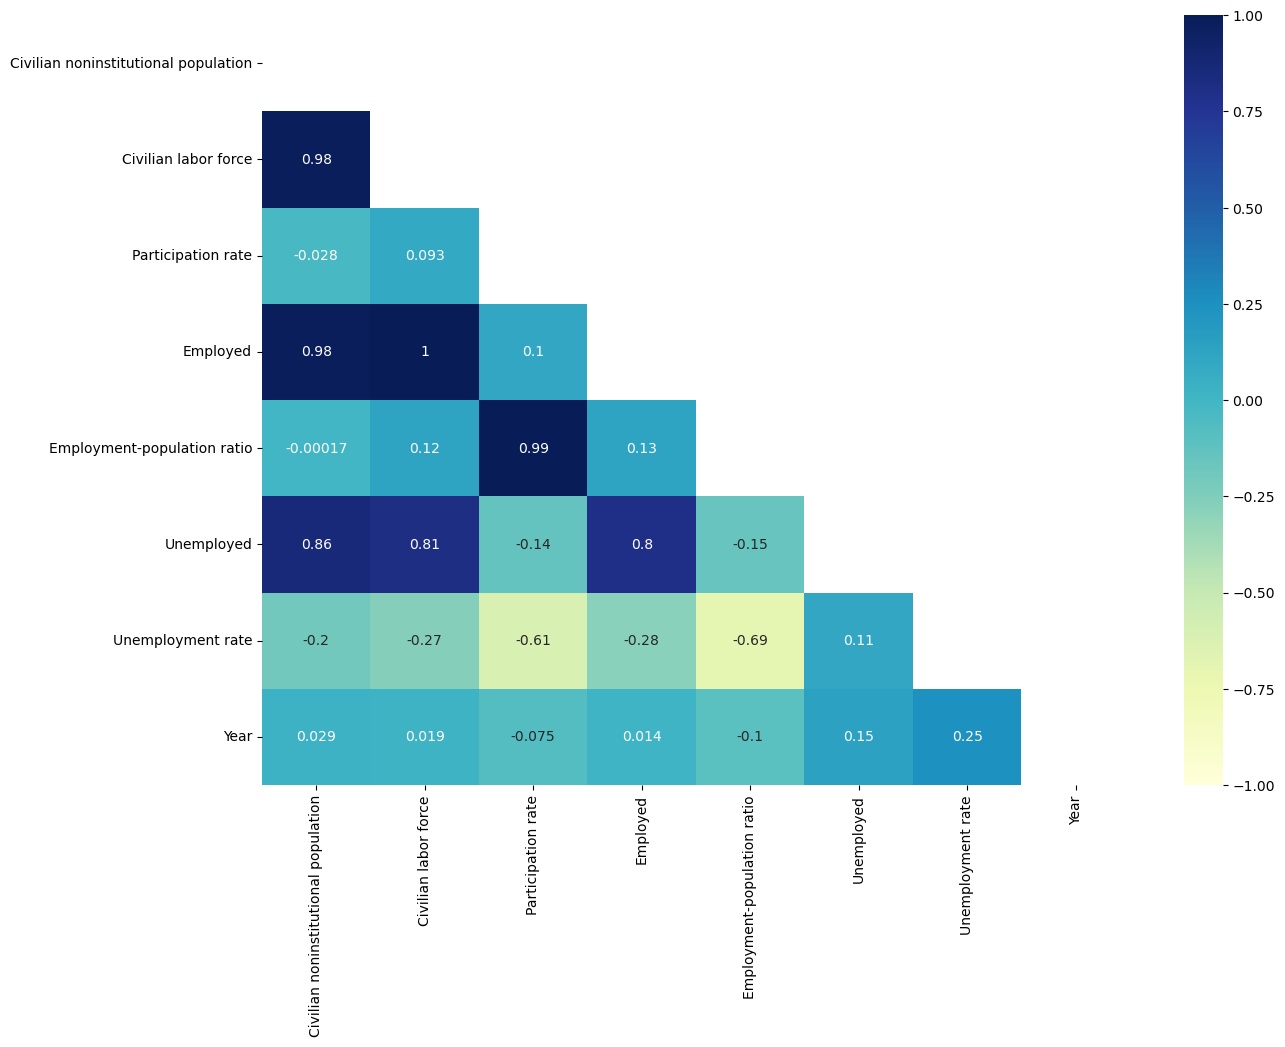

In [108]:
plt.figure(figsize= (14,10))

corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(data = corr,
            annot = True,
            mask = mask,
            cmap = "YlGnBu",
            vmin = -1,
            vmax = 1);

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Civilian noninstitutional population', ylabel='Density'>

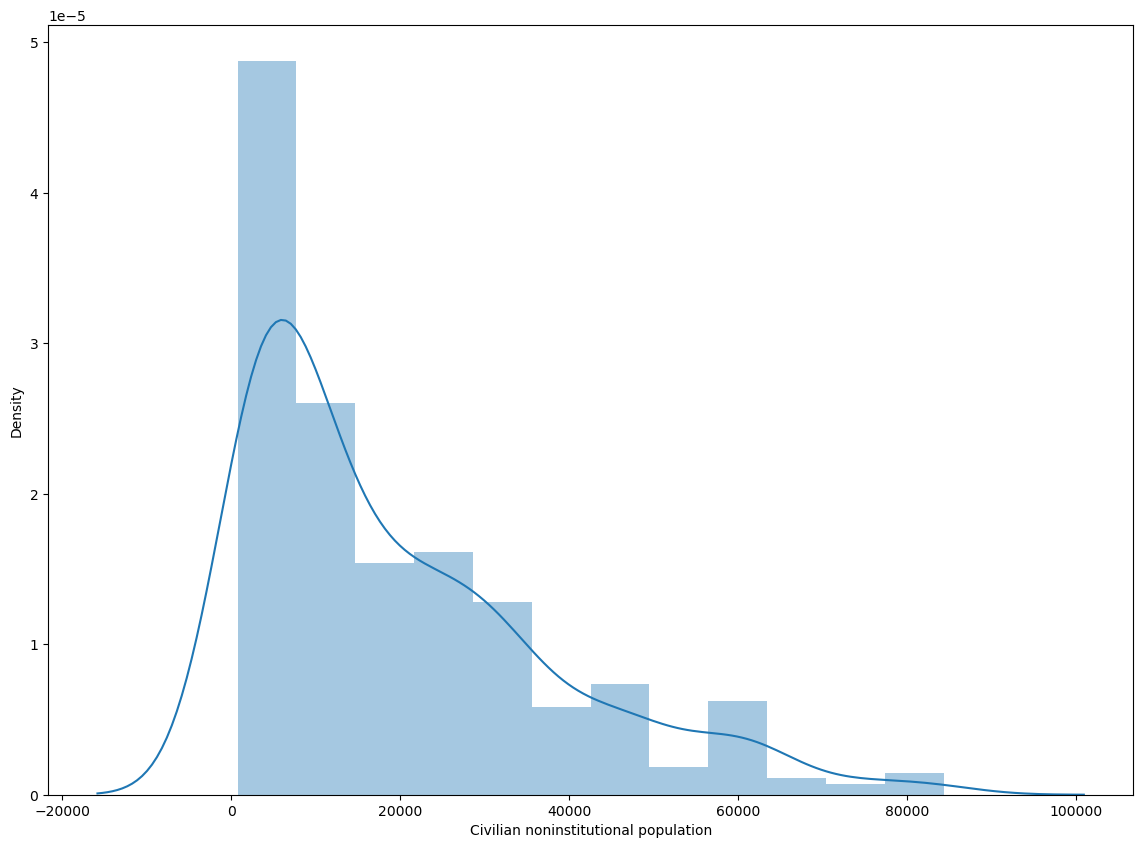

In [109]:
plt.figure(figsize= (14,10))
sns.distplot(data['Civilian noninstitutional population'])

<AxesSubplot:xlabel='Civilian labor force', ylabel='Count'>

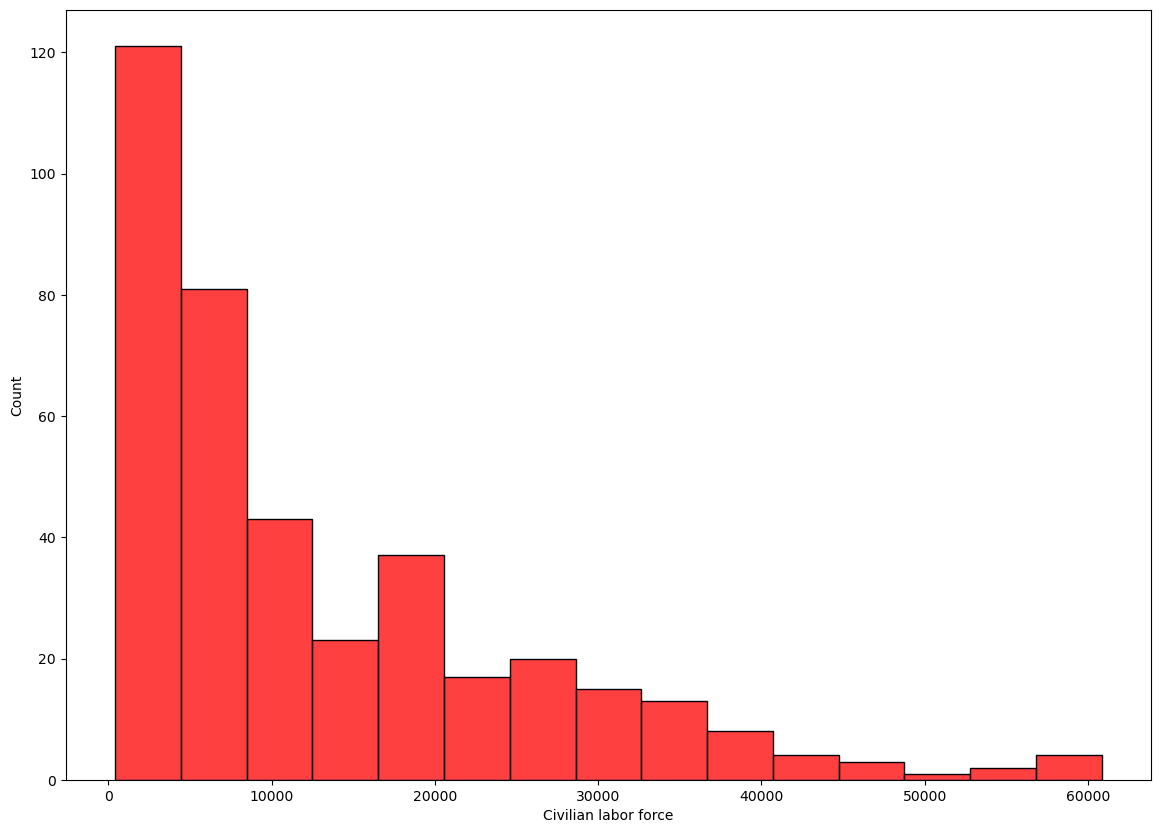

In [110]:
plt.figure(figsize= (14,10))

sns.histplot(data['Civilian labor force'],color='red')

# Encoding

### At this stage we start converting any object feature to a numeric one to be suitable for the modeling stage

### We will use labelEncoding method

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
le = LabelEncoder()

In [113]:
data['Race'] = le.fit_transform(data['Race'])

#### Checking if all the dataset are converted

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian noninstitutional population  392 non-null    int32  
 1   Civilian labor force                  392 non-null    int32  
 2   Participation rate                    392 non-null    float64
 3   Employed                              392 non-null    int32  
 4   Employment-population ratio           392 non-null    float64
 5   Unemployed                            392 non-null    int32  
 6   Unemployment rate                     392 non-null    float64
 7   Race                                  392 non-null    int32  
 8   Year                                  392 non-null    int64  
dtypes: float64(3), int32(5), int64(1)
memory usage: 20.0 KB


#### We are good ,now we move to the second stage

# Features Separating 

In [115]:
x = data.drop(['Unemployment rate'], axis=1)
y = data['Unemployment rate']

#### X contains the target data that we need to predict later

#### Y contains the target values

# Splitting the Dataset 

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

### we split the data 75% to be trained and 25% to tested on
# Modeling with Linear regression
### Start fitting the training and testing data to the model 
### Then saving the model predictions to a variable to compare it later

#  Linear Regression
#### Linear regression is one of the most basic types of regression in machine learning. The linear regression model consists of a predictor variable and a dependent variable related linearly to each other. In case the data involves more than one independent variable, then linear regression is called multiple linear regression. 

![Alt text](https://www.upgrad.com/blog/wp-content/uploads/2020/07/438px-Linear_regression.svg-1.png)

In [118]:
from sklearn import linear_model

In [119]:
reg = linear_model.LinearRegression()

In [120]:
reg.fit(x_train , y_train)

LinearRegression()

In [121]:
reg.score(x_train , y_train)

0.9550051664538138

In [122]:
LRAcc= reg.score(x_test , y_test)
LRAcc

0.9397401519603676

In [123]:
y_pred = reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

,Y_test,Y_pred
280,11.7,10.297077
68,3.7,3.592479
295,3.8,3.803918
82,3.6,3.887395
368,15.2,11.915869
381,3.4,3.155849
106,4.3,4.198916
355,5.7,6.007848
377,8.1,8.339809
47,2.3,1.737329


In [157]:
sorted_df1 = df.sort_index()
sorted_df1.head(15)

,Y_test,Y_pred
1,5.4,5.061645
6,2.8,2.683771
11,4.8,5.079233
12,3.6,3.595076
13,2.5,2.395561
14,2.6,2.264898
18,4.7,4.902613
24,6.8,7.026167
25,4.6,4.567522
34,7.4,8.049048


In [186]:
# t = np.linspace(0, 80_000, 1000)

# X = ['X' + str(i) for i in range(0, 6)]
# y_hat = ['y' + str(i) for i in range(0, 6)]
# df_tmp = data.drop(['Unemployment rate'], axis=1)
# keys = list(df_tmp.keys())

# for i in range(0, 6):
    
#     X[i] = x_train[[keys[i]]]
#     reg = linear_model.LinearRegression().fit(X[i], y_train)
#     y_hat[i] = reg.intercept_ + reg.coef_ * t

In [185]:
# plt.scatter(data['Civilian noninstitutional population'], data['Unemployment rate'])
# plt.plot(t, y_hat[0])

<function matplotlib.pyplot.show(close=None, block=None)>

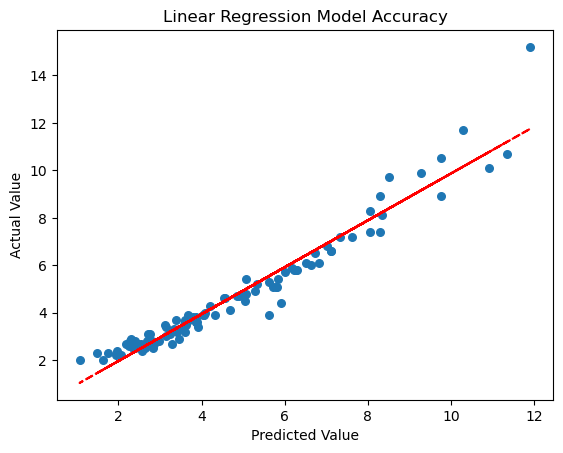

In [180]:
plt.scatter(x = y_pred, y = y_test, s=30)

x = y_pred
y = y_test
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model Accuracy')
plt.show

In [171]:
res1 = y_test - y_pred
print(res1)

280    1.402923
68     0.107521
295   -0.003918
82    -0.287395
368    3.284131
         ...   
12     0.004924
123   -0.150286
378   -0.493488
270    0.157639
139   -0.275926
Name: Unemployment rate, Length: 98, dtype: float64


In [184]:
# plt.scatter(y_pred, res1)
# plt.xlabel('Predicted Values')
# plt.ylabel('Residuals')
# plt.title("Residual Plot")
# plt.show()

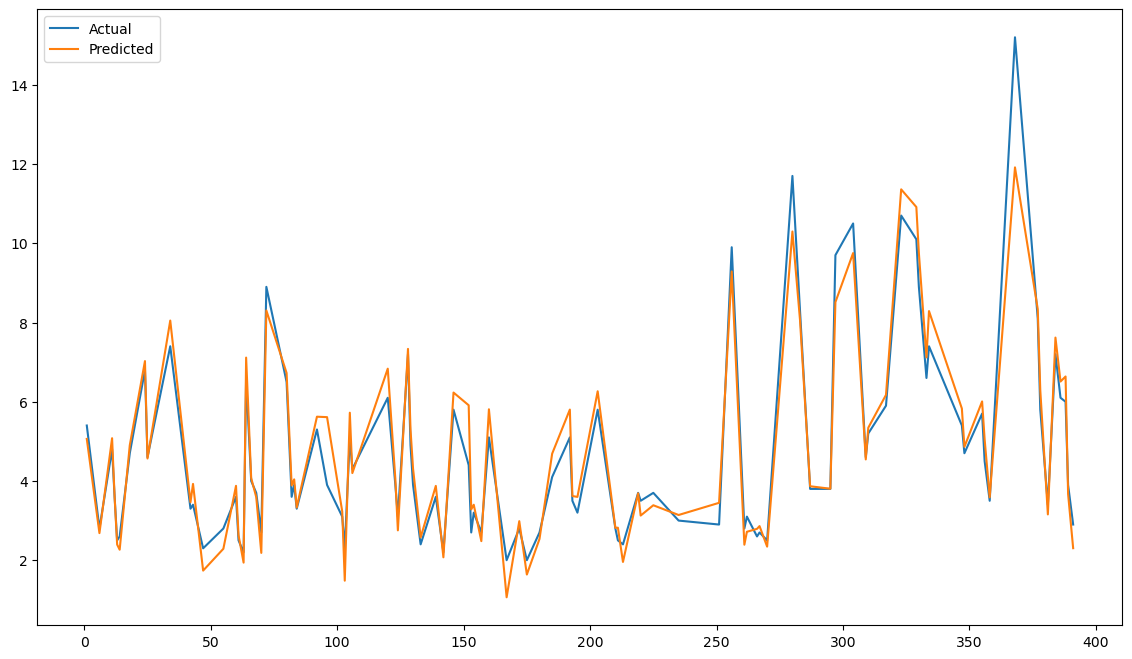

In [125]:
plt.figure(figsize=(14,8))
plt.plot(sorted_df1[:])
plt.legend(['Actual' , 'Predicted'])

# Decision Tree Regression

### Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a known set of numbers or values.

![Alt text](https://media.geeksforgeeks.org/wp-content/uploads/decision-tree.jpg)

In [126]:
from sklearn.tree import DecisionTreeRegressor 

In [127]:
regressor = DecisionTreeRegressor(random_state = 0) 

In [128]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [129]:
regressor.score(x_train,y_train)

1.0

In [130]:
DTAcc=regressor.score(x_test,y_test)
DTAcc

0.8257990778829347

In [131]:
y_pred_2 = regressor.predict(x_test)
df2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_2})
df2.head(10)

,Y_test,Y_pred
280,11.7,9.0
68,3.7,5.0
295,3.8,2.3
82,3.6,4.0
368,15.2,16.1
381,3.4,4.4
106,4.3,5.0
355,5.7,7.3
377,8.1,10.4
47,2.3,2.7


In [132]:
sorted_df2 = df2.sort_index()
sorted_df2.head(15)

,Y_test,Y_pred
1,5.4,5.2
6,2.8,2.6
11,4.8,4.2
12,3.6,5.0
13,2.5,2.6
14,2.6,2.2
18,4.7,4.2
24,6.8,5.6
25,4.6,4.5
34,7.4,6.6


<function matplotlib.pyplot.show(close=None, block=None)>

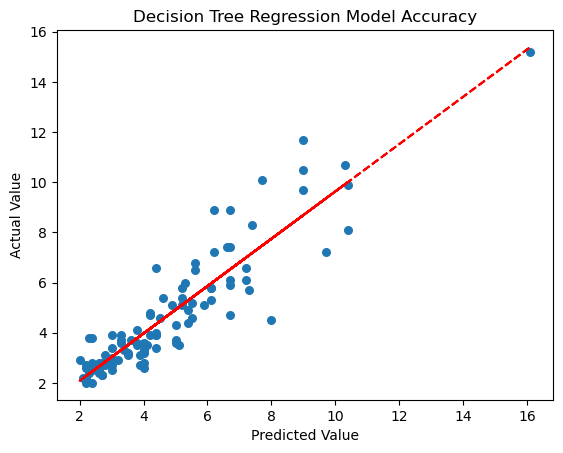

In [181]:
plt.scatter(x = y_pred_2, y = y_test, s=30)

x = y_pred_2
y = y_test
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Decision Tree Regression Model Accuracy')
plt.show

In [173]:
res2 = y_test - y_pred_2
print(res2)

280    2.7
68    -1.3
295    1.5
82    -0.4
368   -0.9
      ... 
12    -1.4
123    0.6
378   -0.3
270    0.1
139    0.3
Name: Unemployment rate, Length: 98, dtype: float64


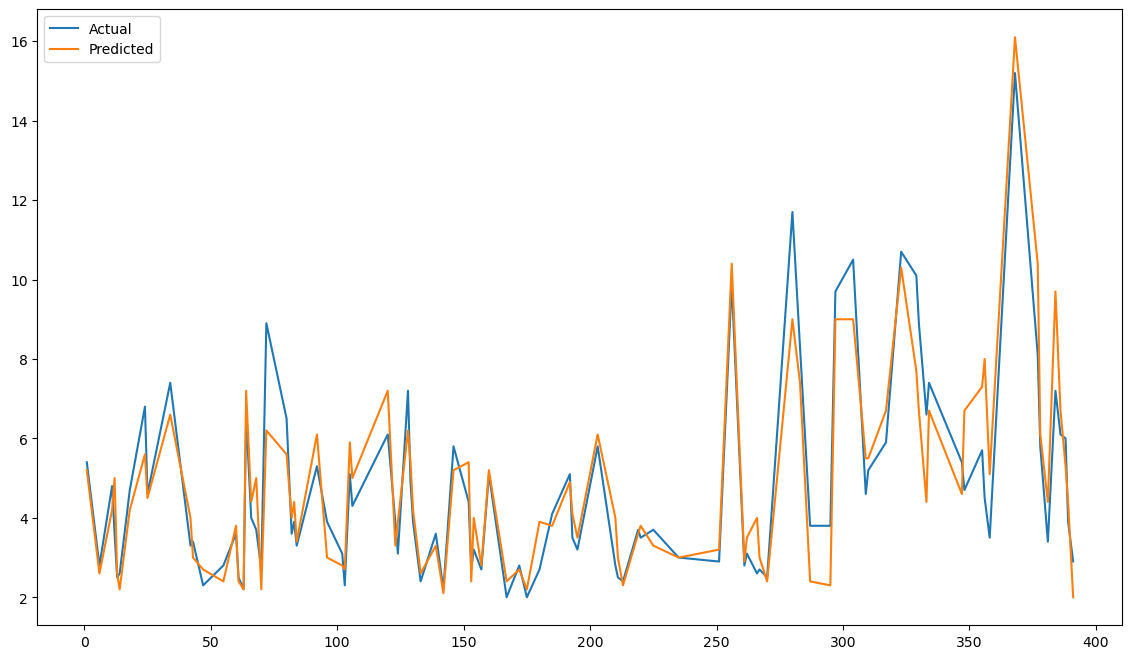

In [133]:
plt.figure(figsize=(14,8))
plt.plot(sorted_df2[:])
plt.legend(['Actual' , 'Predicted'])

# KNN Regression
### what the KNeighborsRegressor() algorithm from sklearn library will do is to calculate the regression for the dataset and then take the n_neighbors parameter with the number chosen, check the results of those neighbors and average the results, giving an estimated result.

In [134]:
from sklearn.neighbors import KNeighborsRegressor

In [135]:
knn_model = KNeighborsRegressor(n_neighbors=4).fit(x_train, y_train)

In [191]:
knn_model.score(x_train, y_train)

0.7097803903153235

In [192]:
knnAcc=knn_model.score(x_test, y_test)
knnAcc

0.4769773776237368

In [138]:
preds = knn_model.predict(x_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': y_test - preds})
# View
performance

,True Value,Prediction,Error
280,11.7,7.100,4.600
68,3.7,4.950,-1.250
295,3.8,2.025,1.775
82,3.6,3.225,0.375
368,15.2,13.725,1.475
...,...,...,...
12,3.6,4.625,-1.025
123,3.9,3.675,0.225
378,5.8,4.825,0.975
270,2.5,4.025,-1.525


In [193]:
sorted_knn = performance.sort_index()
sorted_knn.head(15)

,True Value,Prediction,Error
1,5.4,5.025,0.375
6,2.8,3.350,-0.550
11,4.8,3.675,1.125
12,3.6,4.625,-1.025
13,2.5,2.425,0.075
14,2.6,2.000,0.600
18,4.7,4.050,0.650
24,6.8,6.650,0.150
25,4.6,4.275,0.325
34,7.4,7.275,0.125


<function matplotlib.pyplot.show(close=None, block=None)>

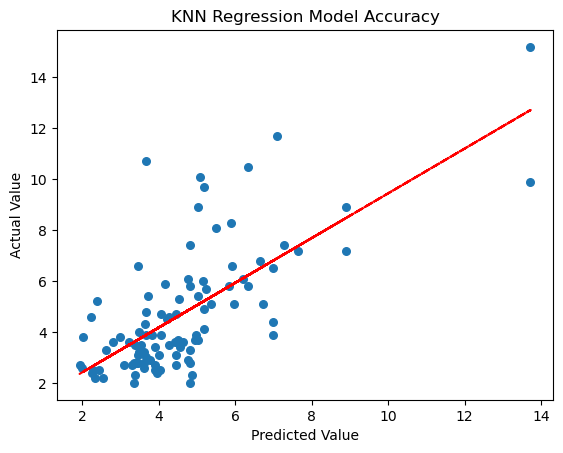

In [188]:
plt.scatter(x = preds, y = y_test, s=30)

x = preds
y = y_test
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('KNN Regression Model Accuracy')
plt.show

In [189]:
residuals = y_test - preds
print(residuals)

280    4.600
68    -1.250
295    1.775
82     0.375
368    1.475
       ...  
12    -1.025
123    0.225
378    0.975
270   -1.525
139   -0.825
Name: Unemployment rate, Length: 98, dtype: float64


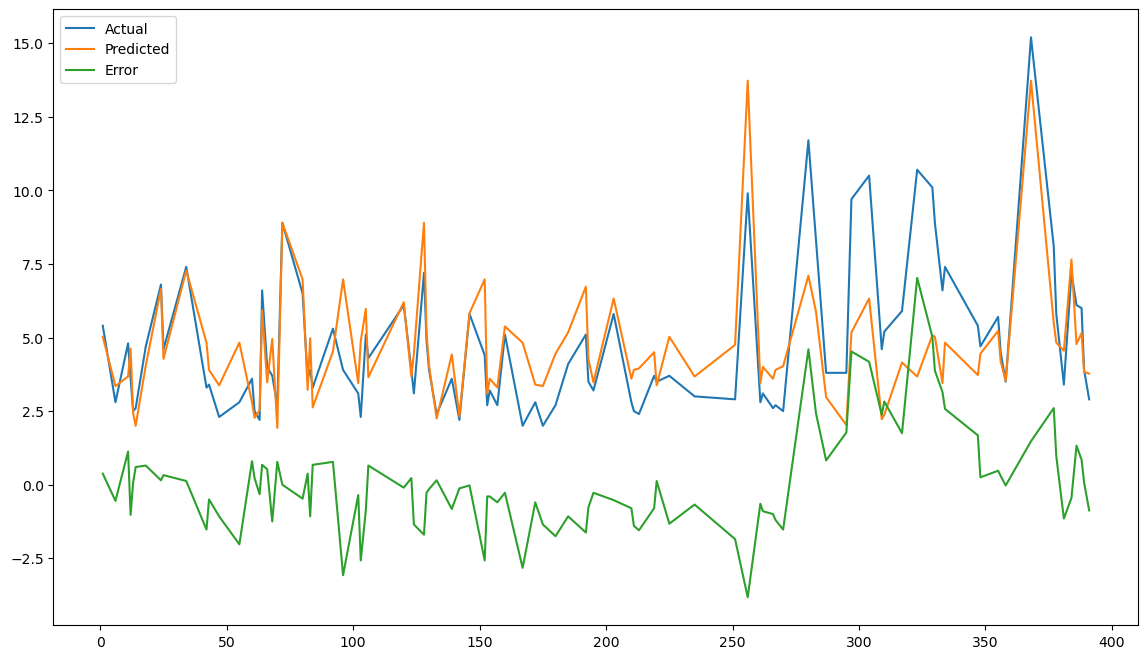

In [195]:
plt.figure(figsize=(14,8))
plt.plot(sorted_knn[:])
plt.legend(['Actual' , 'Predicted' , 'Error'])

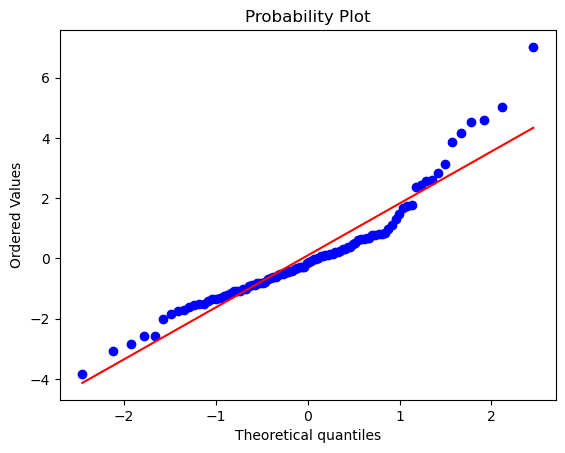

In [139]:
from scipy.stats import probplot
#QQ Plot
ax_x= performance['True Value']
ax_y= performance['Prediction']
yerr= performance['Error']
probplot(yerr, dist='norm', plot=plt);

### The model presents some outliers, but most of the predictions are good. It can be enhanced with a little more cleanup of the data.

# Ridge Regression

##### Ridge regression is basically a regularized version of a Linear Regression. i.e to the original cost function of linear regressor we add a regularized term that forces the learning algorithm to fit the data and helps to keep the weights lower as possible. The regularized term has the parameter ‘alpha’ which controls the regularization of the model i.e helps in reducing the variance of the estimates. 


In [140]:
from sklearn.linear_model import Ridge

In [141]:
ridge = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \
              solver ='auto', random_state = 42)

In [142]:
ridge.fit(x_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Ridge(alpha=0.5, normalize=False, random_state=42)

In [143]:
y_pred_3 = ridge.predict(x_test)

In [144]:
df3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_3})
df3.head(10)

,Y_test,Y_pred
280,11.7,10.295248
68,3.7,3.589048
295,3.8,3.802566
82,3.6,3.883345
368,15.2,11.915101
381,3.4,3.163758
106,4.3,4.196496
355,5.7,6.012115
377,8.1,8.339502
47,2.3,1.743482


In [145]:
sorted_df3 = df3.sort_index()
sorted_df3.head(15)

,Y_test,Y_pred
1,5.4,5.058701
6,2.8,2.683063
11,4.8,5.075029
12,3.6,3.591095
13,2.5,2.391873
14,2.6,2.264286
18,4.7,4.901334
24,6.8,7.026356
25,4.6,4.564310
34,7.4,8.037215


<function matplotlib.pyplot.show(close=None, block=None)>

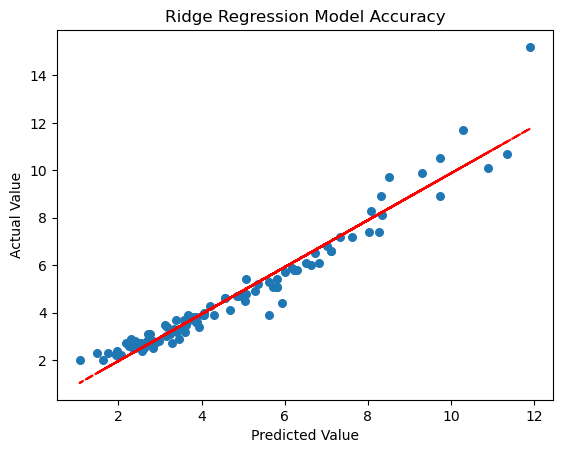

In [182]:
plt.scatter(x = y_pred_3, y = y_test, s=30)

x = y_pred_3
y = y_test
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Ridge Regression Model Accuracy')
plt.show

In [178]:
res3 = y_test - y_pred_3
print(res3)

280    1.404752
68     0.110952
295   -0.002566
82    -0.283345
368    3.284899
         ...   
12     0.008905
123   -0.149482
378   -0.492940
270    0.148228
139   -0.277308
Name: Unemployment rate, Length: 98, dtype: float64


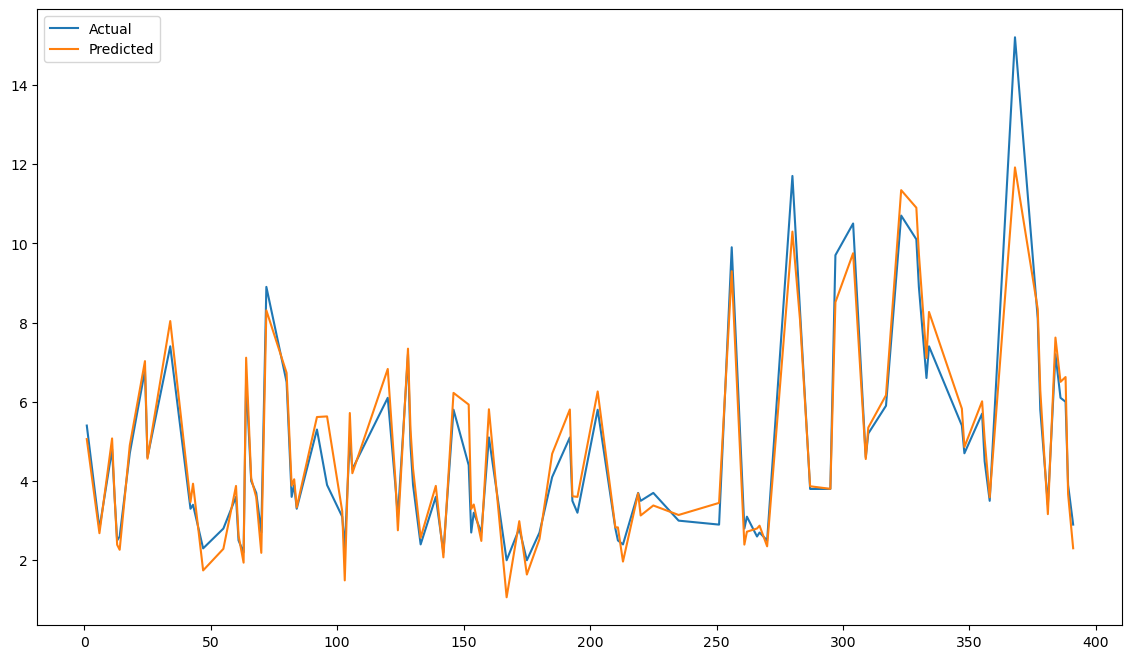

In [146]:
plt.figure(figsize=(14,8))
plt.plot(sorted_df3[:])
plt.legend(['Actual' , 'Predicted']);

In [196]:
ridge.score(x_train, y_train)

0.9549995648036976

In [197]:
RidAcc=ridge.score(x_test, y_test)
RidAcc

0.9398775484110117

### Create Accuracy Comparison Table

In [156]:
compare = pd.DataFrame({'Model': ['Linear Regression','Decision Tree','KNN Regression', 'Ridge Regression'],  
                        'Accuracy': [ LRAcc*100, DTAcc*100, knnAcc*100, RidAcc*100]})

compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

C:\Users\zee52\AppData\Local\Temp\ipykernel_30032\3998763983.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})


Model,Accuracy
Ridge Regression,93.987755
Linear Regression,93.974015
Decision Tree,82.579908
KNN Regression,47.697738


### Ridge Regression is the best model for this data with 93.99 accuracy 

-----------------------------------------

# Artificial Neural Networks for Regression
### In this case, I am going to implement a Deep Learning ANN for a Regression use case.

![Alt text](https://d2r55xnwy6nx47.cloudfront.net/uploads/2022/02/SCALING_NETS_2880x1620_Lede.svg)

# ANN

#### In the below code snippet, the “Sequential” module from the Keras library is used to create a sequence of ANN layers stacked one after the other. Each layer is defined using the “Dense” module of Keras where we specify how many neurons would be there.

In [150]:
# Download needed libraries
# %pip install tensorflow
# %pip install keras
# %pip install nnv

In [151]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [152]:
model = Sequential()

In [153]:
model = Sequential()
model.add(Dense(1000, input_shape=(x_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(390, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(175, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    callbacks=[es],
                    epochs=500,
                    batch_size=50,
                    verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1000)              9000      
                                                                 
 dense_8 (Dense)             (None, 500)               500500    
                                                                 
 dense_9 (Dense)             (None, 390)               195390    
                                                                 
 dense_10 (Dense)            (None, 300)               117300    
                                                                 
 dense_11 (Dense)            (None, 250)               75250     
                                                                 
 dense_12 (Dense)            (None, 175)               43925     
                                                                 
 dense_13 (Dense)            (None, 1)                

### I am using five hidden layers with 500, 390, 300, 250 and 175 neurons respectively and one output layer with one neuron. 

#### Lets quickly understand the hyperparameters:
- Dense = 1000: This means we are creating a layer with 1000 neurons in it. Each of these 1000 neurons will be receiving the values of inputs.

- kernel_initializer= 'normal': When the Neurons start their computation, some algorithm has to decide the value for each weight. This parameter specifies that. You can choose different values for it like ‘normal’ or ‘glorot_uniform’.

- activation='relu': This specifies the activation function for the calculations inside each neuron. You can choose values like 'relu', 'tanh', 'sigmoid'.

- batch_size=50: This specifies how many rows will be passed to the Network in one go after which the SSE calculation will begin and the neural network will start adjusting its weights based on the errors.
When all the rows are passed in the batches of 50 rows each as specified in this parameter, then we call that 1-epoch. Or one full data cycle. This is also known as mini-batch gradient descent. A small value of batch_size will make the ANN look at the data slowly, like 2 rows at a time or 4 rows at a time which could lead to overfitting, as compared to a large value like 20 or 50 rows at a time, which will make the ANN look at the data fast which could lead to underfitting. Hence a proper value must be chosen using hyperparameter tuning.

- Epochs=500: The same activity of adjusting weights continues for 500 times, as specified by this parameter. In simple terms, the ANN looks at the full training data 50 times and adjusts its weights.

#### Neural Network visualization

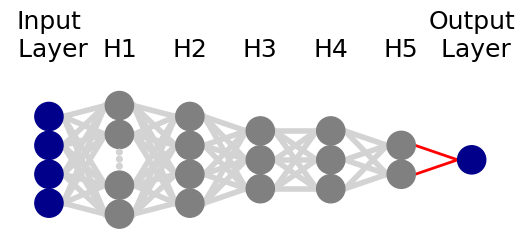

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [154]:
from nnv import NNV

layersList = [
    {"title":"Input\n Layer\n ", "units": 4, "color": "darkBlue"},
    
    {"title":"H1\n", "units": 5},
    {"title":"H2\n", "units": 4},
    {"title":"H3\n", "units": 3},
    {"title":"H4\n", "units": 3},
    {"title":"H5\n", "units": 2, "edges_color":"red", "edges_width":2},
    {"title":"Output\n Layer\n", "units": 1,"color": "darkBlue"},
]

NNV(layersList).render(save_to_file="my_example.png")


> H1 for Hidden Layer 1 and so on.

## Plotting Trial results

4/4 [==============================] - 0s 1ms/step


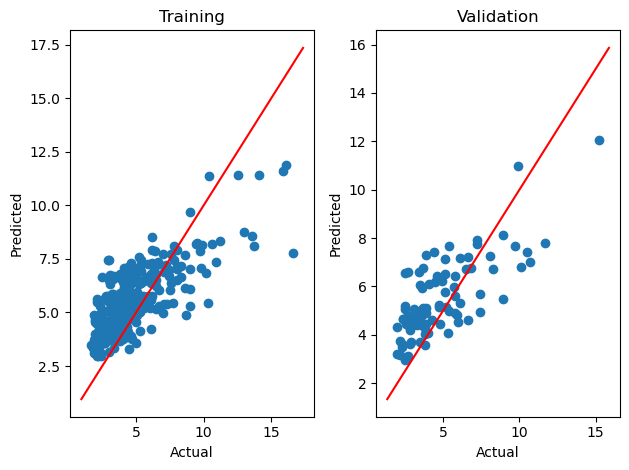

<Figure size 1400x1000 with 0 Axes>

Train data Loss in data: 1.05 %
Test data loss: 0.20 %


In [155]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns
plt.figure(figsize= (14,10))
# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(x_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(x_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()
print('Train data Loss in data: 1.05 %')
print('Test data loss: 0.20 %')